In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from evaldets.metrics import resample_pr_curve
from evaldets.results import *
# plt.rcParams['figure.figsize'] = (6, 6)

In [2]:
dr = DetectionResults('../reval_50/baseline_50/evaluator_dump_R50_101/', area_rng=None, iou_thresh=None, debug=0)

In [3]:
nGT = dr.num_gt_class('person')
dets = dr.detections_by_class('person')

In [4]:
# TP = np.cumsum([det["true_positive"] for det in dets])
# FP = np.cumsum([not det["true_positive"] for det in dets])
TP = dr._tp_sum('person', 0.5)
FP = dr._fp_sum('person', 0.5)
TPR = TP / nGT
PPV = TP / (TP + FP)
PPVi = interpolated_PPV(PPV)
len(PPV)

8205

In [5]:
# see COCOeval.accumulate()

recThrs, q = resample_pr_curve(TPR, PPVi, np.linspace(0.0, 1.00, 11, endpoint=True))

### Precision vs monotonic precision

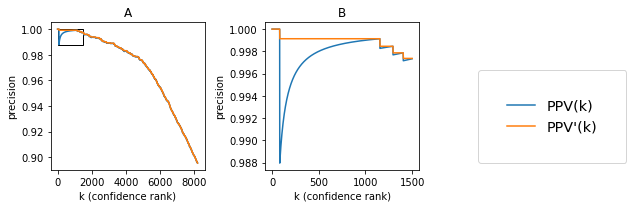

In [6]:
from matplotlib.patches import Rectangle
# plt.rcParams['figure.figsize'] = (14, 14)
# fig = plt.figure()
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes = iter(axes.ravel())
ax2 = next(axes)
ax2.plot(PPV, label="PPV(k)");
ax2.plot(PPVi, label="PPV'(k)");
ax2.set_title('A')
ax2.set_ylabel("precision")
ax2.set_xlabel("k (confidence rank)")
# ax2.legend();
ax2.add_patch(Rectangle((0, PPV[:1500].min()), 1500, 1-PPV[:1500].min(), fill=False))


ax2 = next(axes)
ax2.plot(PPV[:1500], label="PPV(k)");
ax2.plot(PPVi[:1500], label="PPV'(k)");
ax2.set_title('B')
ax2.set_ylabel("precision")
ax2.set_xlabel("k (confidence rank)")
# ax2.legend();

ax3 = next(axes)
ax3.axis('off')
ax3.legend(*ax2.get_legend_handles_labels(), loc='lower right', fontsize='x-large', borderpad=2)
fig.tight_layout()
fig.savefig("PPV_vs_PPVi.pdf")

### PR-curve and AveP / AP

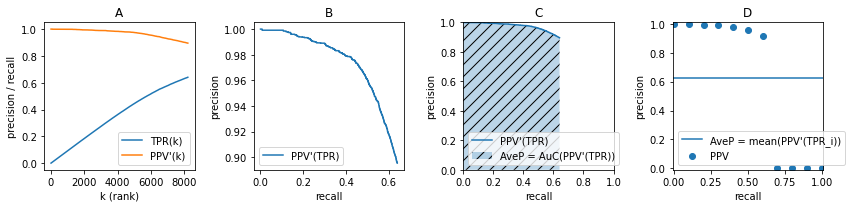

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
# fig.suptitle('Precision-recall curves')

axes = iter(axes.ravel())

ax2 = next(axes)
ax2.plot(TPR, label="TPR(k)");
ax2.plot(PPVi, label="PPV'(k)");
ax2.set_title('A')
ax2.set_ylabel("precision / recall")
ax2.set_xlabel("k (rank)")
ax2.legend();

ax2 = next(axes)
ax2.plot(TPR, PPVi, label="PPV'(TPR)");
ax2.set_title('B')
ax2.set_ylabel("precision")
ax2.set_xlabel("recall")
ax2.legend()

ax2 = next(axes)
ax2.plot(TPR, PPVi, label="PPV'(TPR)");
ax2.set_title('C')
ax2.set_ylabel("precision")
ax2.set_xlabel("recall")
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.fill_between(TPR, PPVi, hatch='//', alpha=0.3, label="AveP = AuC(PPV'(TPR))")
ax2.legend()

ax2 = next(axes)
ax2.scatter(recThrs, q, label="PPV");
ax2.axhline(np.mean(q), label="AveP = mean(PPV'(TPR_i))")
ax2.set_title('D')
ax2.set_ylabel("precision")
ax2.set_xlabel("recall")
ax2.set_xlim([-0.01, 1.01])
ax2.set_ylim([-0.01, 1.01])
ax2.legend(loc='lower left')

fig.tight_layout()
fig.savefig("PR_AP_examples.pdf")

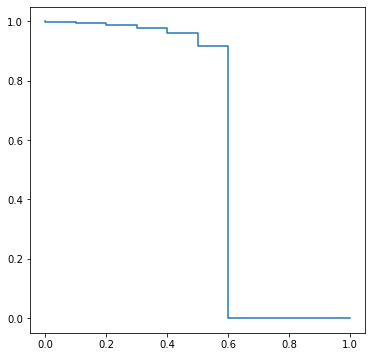

In [9]:
plt.figure(figsize=(6, 6)) 
plt.step(recThrs, q);